<a href="https://colab.research.google.com/github/28Aarya/FHI-score-for-stability/blob/main/Financial_Health_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
pip install yfinance

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [101]:
# Fetch the stocks and relevant data
import yfinance as yf
import pandas as pd

stocks = ['F', 'TM', 'RACE', 'GM','TSLA','NSANY','RIVN','HMC']

def fetch_metrics(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info

    # Define metrics inside the function
    metrics = {
        'ticker': ticker,
        'currentRatio': info.get('currentRatio', None),
        'debtToEquity': info.get('debtToEquity', None),
        'returnOnEquity': info.get('returnOnEquity', None),
        'priceToBook': info.get('priceToBook', None),
        'earningsGrowth': info.get('earningsGrowth', None),
        'dividendYield': info.get('dividendYield', None),
        'beta': info.get('beta', None)
    }

    return metrics

financial_data = [fetch_metrics(stock) for stock in stocks]
financial_df = pd.DataFrame(financial_data)
financial_df.head(8)


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta
0,F,1.147,359.359,0.07990,1.022422,-0.265,0.0537,1.636
1,TM,1.229,103.530,0.12594,0.067275,-0.546,0.0219,0.404
2,RACE,1.538,92.559,0.46376,23.398740,0.143,0.0060,0.992
3,GM,1.209,174.581,0.14167,0.933536,0.218,0.0082,1.414
4,TSLA,1.844,18.078,0.20389,15.527378,0.170,NaN,2.295
5,NSANY,1.793,120.844,0.02716,0.003383,NaN,0.0477,0.933
6,RIVN,5.089,102.458,-0.67157,2.007615,NaN,NaN,2.045
7,HMC,1.431,82.738,0.08327,0.010078,-0.592,0.0528,0.490


In [102]:
financial_df.isnull().sum()

,0
ticker,0
currentRatio,0
debtToEquity,0
returnOnEquity,0
priceToBook,0
earningsGrowth,2
dividendYield,2
beta,0


In [103]:
print(financial_df.loc[financial_df['dividendYield'].isnull(), ['ticker', 'dividendYield']])
print(financial_df.loc[financial_df['earningsGrowth'].isnull(), ['ticker', 'earningsGrowth']])

  ticker  dividendYield
4   TSLA            NaN
6   RIVN            NaN
  ticker  earningsGrowth
5  NSANY             NaN
6   RIVN             NaN


In [104]:
financial_df['dividendYield'].fillna(00, inplace=True) #cause company doesnt give out dividends to share holders
financial_df.head(8)

<ipython-input-104-71849bc3da29>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_df['dividendYield'].fillna(00, inplace=True) #cause company doesnt give out dividends to share holders


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta
0,F,1.147,359.359,0.07990,1.022422,-0.265,0.0537,1.636
1,TM,1.229,103.530,0.12594,0.067275,-0.546,0.0219,0.404
2,RACE,1.538,92.559,0.46376,23.398740,0.143,0.0060,0.992
3,GM,1.209,174.581,0.14167,0.933536,0.218,0.0082,1.414
4,TSLA,1.844,18.078,0.20389,15.527378,0.170,0.0000,2.295
5,NSANY,1.793,120.844,0.02716,0.003383,NaN,0.0477,0.933
6,RIVN,5.089,102.458,-0.67157,2.007615,NaN,0.0000,2.045
7,HMC,1.431,82.738,0.08327,0.010078,-0.592,0.0528,0.490


In [105]:
def calculate_earnings_growth(eps_23, eps_24, ticker, financial_df):
    earnings_growth = (eps_24 - eps_23) / eps_23
    print(f"Earnings growth for {ticker}: {earnings_growth:.2f}")
    financial_df.loc[financial_df['ticker'] == ticker, 'earningsGrowth'] = earnings_growth

    return earnings_growth

nissan_23 = 0.84
nissan_24 = 1.53

rivian_23 = -5.74
rivian_24 = -1.44

calculate_earnings_growth(nissan_23, nissan_24, 'NSANY', financial_df)
calculate_earnings_growth(rivian_23, rivian_24, 'RIVN', financial_df)
financial_df

Earnings growth for NSANY: 0.82
Earnings growth for RIVN: -0.75


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta
0,F,1.147,359.359,0.07990,1.022422,-0.265000,0.0537,1.636
1,TM,1.229,103.530,0.12594,0.067275,-0.546000,0.0219,0.404
2,RACE,1.538,92.559,0.46376,23.398740,0.143000,0.0060,0.992
3,GM,1.209,174.581,0.14167,0.933536,0.218000,0.0082,1.414
4,TSLA,1.844,18.078,0.20389,15.527378,0.170000,0.0000,2.295
5,NSANY,1.793,120.844,0.02716,0.003383,0.821429,0.0477,0.933
6,RIVN,5.089,102.458,-0.67157,2.007615,-0.749129,0.0000,2.045
7,HMC,1.431,82.738,0.08327,0.010078,-0.592000,0.0528,0.490


In [106]:
financial_df.describe()

,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.910000,131.768375,0.056752,5.371303,-0.099963,0.023788,1.276125
std,1.310902,101.610681,0.323347,8.974132,0.530724,0.023913,0.692289
min,1.147000,18.078000,-0.671570,0.003383,-0.749129,0.000000,0.404000
25%,1.224000,90.103750,0.066715,0.052975,-0.557500,0.004500,0.822250
50%,1.484500,102.994000,0.104605,0.977979,-0.061000,0.015050,1.203000
75%,1.805750,134.278250,0.157225,5.387556,0.182000,0.048975,1.738250
max,5.089000,359.359000,0.463760,23.398740,0.821429,0.053700,2.295000


In [107]:
#standardise the data to make it more comparable

std_columns= ['currentRatio',	'debtToEquity',	'returnOnEquity',	'priceToBook',	'earningsGrowth',	'dividendYield',	'beta'] #dividend payout ratio instead
financial_df[std_columns] = financial_df[std_columns].apply(lambda x: (x - x.mean()) / x.std())
financial_df.head(8)

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta
0,F,-0.582042,2.239830,0.071587,-0.484602,-0.310967,1.250875,0.519833
1,TM,-0.519490,-0.277908,0.213973,-0.591035,-0.840432,-0.078931,-1.259770
2,RACE,-0.283774,-0.385878,1.258735,2.008822,0.457794,-0.743834,-0.410414
3,GM,-0.534746,0.421340,0.262621,-0.494507,0.599111,-0.651835,0.199158
4,TSLA,-0.050347,-1.118882,0.455046,1.131706,0.508668,-0.994741,1.471748
5,NSANY,-0.089252,-0.107512,-0.091519,-0.598155,1.736102,0.999968,-0.495638
6,RIVN,2.425048,-0.288458,-2.252452,-0.374820,-1.223171,-0.994741,1.110627
7,HMC,-0.365397,-0.482532,0.082010,-0.597409,-0.927106,1.213239,-1.135544


In [108]:
# Assign weights focused on FHI for stability

weights = {
        'currentRatio': 0.2,
        'debtToEquity': 0.25,
        'returnOnEquity':0.15,
        'priceToBook':0.1,
        'earningsGrowth':0.1,
        'dividendYield':0.2,
        'beta':0.2

}


In [109]:
# Function to calculate FHI for each stock
def calculate_fhi(row, weights):
    fhi_score = 0
    for metric, weight in weights.items():
        if pd.notnull(row[metric]):
            fhi_score += row[metric] * weight
    return fhi_score

financial_df['FHI'] = financial_df.apply(calculate_fhi, axis=1, weights=weights)
print(financial_df[['ticker', 'FHI']])


  ticker       FHI
0      F  0.728872
1     TM -0.552166
2   RACE  0.051398
3     GM -0.042296
4   TSLA  0.037906
5  NSANY  0.156204
6   RIVN -0.061594
7    HMC -0.318323


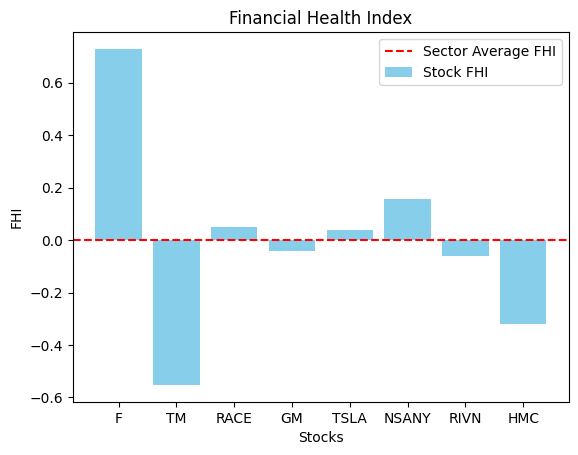

In [118]:
sector_avg_fhi = financial_df['FHI'].mean()

plt.axhline(y=sector_avg_fhi, color='r', linestyle='--', label='Sector Average FHI')
plt.bar(financial_df['ticker'], financial_df['FHI'], color='skyblue', label='Stock FHI')
plt.title('Financial Health Index')
plt.xlabel('Stocks')
plt.ylabel('FHI')
plt.legend()
plt.show()

In [111]:
#calculate sector fhi, compare with the stocks for further data analysis
sector_avg_fhi = financial_df['FHI'].mean()

# Performance of stocks
financial_df['Performance'] = financial_df['FHI'].apply(lambda x: 'Overperforming' if x > sector_avg_fhi else 'Underperforming')
print(f"Sector Average FHI: {sector_avg_fhi:.2f}")
print(financial_df[['ticker', 'FHI', 'Performance']])



Sector Average FHI: -0.00
  ticker       FHI      Performance
0      F  0.728872   Overperforming
1     TM -0.552166  Underperforming
2   RACE  0.051398   Overperforming
3     GM -0.042296  Underperforming
4   TSLA  0.037906   Overperforming
5  NSANY  0.156204   Overperforming
6   RIVN -0.061594  Underperforming
7    HMC -0.318323  Underperforming


In [112]:
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,FHI,Performance
0,F,-0.582042,2.239830,0.071587,-0.484602,-0.310967,1.250875,0.519833,0.728872,Overperforming
1,TM,-0.519490,-0.277908,0.213973,-0.591035,-0.840432,-0.078931,-1.259770,-0.552166,Underperforming
2,RACE,-0.283774,-0.385878,1.258735,2.008822,0.457794,-0.743834,-0.410414,0.051398,Overperforming
3,GM,-0.534746,0.421340,0.262621,-0.494507,0.599111,-0.651835,0.199158,-0.042296,Underperforming
4,TSLA,-0.050347,-1.118882,0.455046,1.131706,0.508668,-0.994741,1.471748,0.037906,Overperforming
5,NSANY,-0.089252,-0.107512,-0.091519,-0.598155,1.736102,0.999968,-0.495638,0.156204,Overperforming
6,RIVN,2.425048,-0.288458,-2.252452,-0.374820,-1.223171,-0.994741,1.110627,-0.061594,Underperforming
7,HMC,-0.365397,-0.482532,0.082010,-0.597409,-0.927106,1.213239,-1.135544,-0.318323,Underperforming


In [113]:
financial_df['FHI_zscore'] = (financial_df['FHI'] - financial_df['FHI'].mean()) / financial_df['FHI'].std()

# Detect outliers
outliers = financial_df[(financial_df['FHI_zscore'] > 1) | (financial_df['FHI_zscore'] < -1)]
financial_df['valuation'] = np.where(financial_df['FHI_zscore'] > 1.00, 'Overvalued',
                          np.where(financial_df['FHI_zscore'] < -1.00, 'Undervalued', 'Fairly Valued'))


print("\nStocks with Valuation Categories:")
print(financial_df[['ticker', 'FHI', 'FHI_zscore', 'valuation']])



Stocks with Valuation Categories:
  ticker       FHI  FHI_zscore      valuation
0      F  0.728872    1.956463     Overvalued
1     TM -0.552166   -1.482142    Undervalued
2   RACE  0.051398    0.137964  Fairly Valued
3     GM -0.042296   -0.113533  Fairly Valued
4   TSLA  0.037906    0.101748  Fairly Valued
5  NSANY  0.156204    0.419289  Fairly Valued
6   RIVN -0.061594   -0.165334  Fairly Valued
7    HMC -0.318323   -0.854455  Fairly Valued


In [114]:
new_df= financial_df[['ticker', 'FHI', 'Performance', 'valuation']]
new_df

,ticker,FHI,Performance,valuation
0,F,0.728872,Overperforming,Overvalued
1,TM,-0.552166,Underperforming,Undervalued
2,RACE,0.051398,Overperforming,Fairly Valued
3,GM,-0.042296,Underperforming,Fairly Valued
4,TSLA,0.037906,Overperforming,Fairly Valued
5,NSANY,0.156204,Overperforming,Fairly Valued
6,RIVN,-0.061594,Underperforming,Fairly Valued
7,HMC,-0.318323,Underperforming,Fairly Valued


In [ ]:
#data insights: solvency, liquidity and profitability
'''def financial_summary(row):
  solvency=
  liqiudity=
  profitability=
  return solvency, liqiudity, profitability

financial_df['summary']= financial_df.apply(financial_summary, axis=1)
'''

In [ ]:
'''new_df['summary']= financial_df['summary']
new_df'''

In [ ]:
#report BASED ON VALUATION,summary and fhi/ performance- use reportlabs or fpdf

In [ ]:
'''
#investment recommendation ^?
def stock_recommendation(row):
  if row['valuation']==
    return 'buy'
  if row ['valuation']==
    return 'sell'
  else:
    return 'hold'

financial_df['recommendation']= financial_df.apply(stock_recommendation, axis=1)
'''



In [ ]:
#prediction(?) with prophet